# CPA Attack on dataset 2

## Read the data

### Imports and Global variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Data directory
workdir = "data/dataset2"

### Cleartext file

In [2]:
# Initialize a 2D NumPy array for plaintexts
# Dimensions: 150 plaintexts x 16 bytes
plaintexts = np.zeros((150, 16), dtype=int)

# Read the plaintexts
with open(f'{workdir}/cleartext.txt', 'r') as file:
    for i, line in enumerate(file):
        # Convert line to integer values and store in array
        plaintexts[i] = np.array(line.strip().split(), dtype=int)

In [3]:
print(f"plaintexts dimmensions: {plaintexts.shape}")
print(f"First line of trace0.txt: {plaintexts[0]}")

plaintexts dimmensions: (150, 16)
First line of trace0.txt: [135  11 211  69 167 231 179  68  34 206 119 212 102 210 145 177]


### Traces files

In [4]:
# Initialize a 3D NumPy array to hold all traces
# Dimensions: 16 key bytes x 150 traces x 50000 samples
all_traces = np.zeros((16, 150, 50000), dtype=float)

# Read the traces
for i in range(16):
    filename = f'{workdir}/trace{i}.txt'
    with open(filename, 'r') as file:
        for j, line in enumerate(file):
            # Convert line to float values and store in array
            all_traces[i, j] = np.array(line.strip().split(), dtype=float)
    i+=1



In [5]:
print(f"all_traces dimmensions: {all_traces.shape}")
print(f"First line of trace0.txt: {all_traces[0][0]}")


all_traces dimmensions: (16, 150, 50000)
First line of trace0.txt: [0.1353 0.1235 0.1012 ... 0.1277 0.1234 0.1085]


In [16]:
# Initialize a 3D NumPy array to hold all traces
# Dimensions: 16 key bytes x 150 traces x 50000 samples
all_traces_1 = np.zeros((16, 150, 50000), dtype=float)

# Read the traces
for i in range(16):
    filename = f'data/dataset1/trace{i}.txt'
    with open(filename, 'r') as file:
        for j, line in enumerate(file):
            # Convert line to float values and store in array
            all_traces_1[i, j] = np.array(line.strip().split(), dtype=float)
    i+=1

### Clock files

In [7]:
# Dimensions: 16 key bytes x 150 traces x 50000 samples
all_clocks = np.zeros((16, 150, 50000), dtype=float)

# Read the traces
for i in range(16):
    filename = f'{workdir}/clock{i}.txt'
    with open(filename, 'r') as file:
        for j, line in enumerate(file):
            # Convert line to float values and store in array
            all_clocks[i, j] = np.array(line.strip().split(), dtype=float)
    i+=1

In [8]:
print(f"all_clocks dimmensions: {all_clocks.shape}")
print(f"First line of clock0.txt: {all_clocks[0][0]}")

all_clocks dimmensions: (16, 150, 50000)
First line of clock0.txt: [ 0.9507  0.9245  0.9326 ... -0.0149 -0.0447 -0.0228]


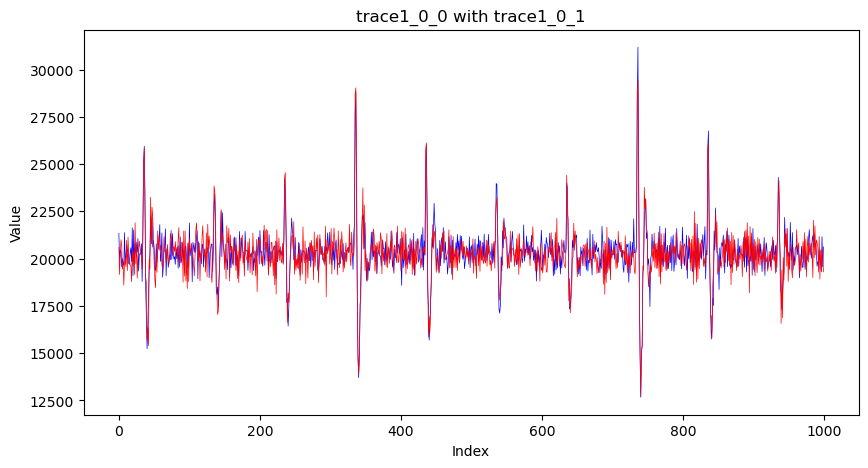

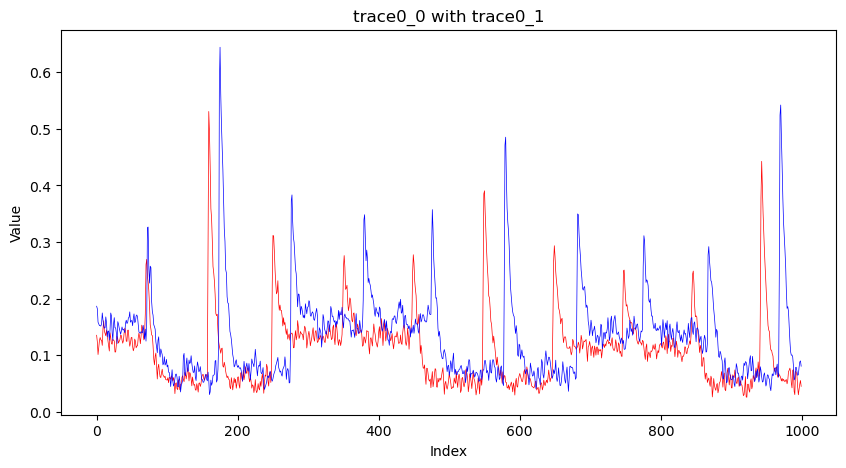

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(all_traces_1[0][0][:1000], 'blue', linewidth=0.5)
plt.plot(all_traces_1[0][1][:1000], 'red', linewidth=0.5)

plt.title('trace1_0_0 with trace1_0_1')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()



# plt.figure(figsize=(10, 5))
# plt.plot(all_traces[0][0][:1000], 'k', linewidth=0.5)
# plt.plot(all_clocks[0][0][:1000], 'k', linewidth=0.5)

# plt.title('trace0_0 with clock0_0')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.show()



# plt.figure(figsize=(10, 5))
# plt.plot(all_traces[0][1][:1000], 'k', linewidth=0.5)
# plt.plot(all_clocks[0][1][:1000], 'k', linewidth=0.5)

# plt.title('trace0_1 with clock0_1')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.show()



plt.figure(figsize=(10, 5))
plt.plot(all_traces[0][0][:1000], 'red', linewidth=0.5)
plt.plot(all_traces[0][1][:1000], 'blue', linewidth=0.5)

plt.title('trace0_0 with trace0_1')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

## Plotting the data

### Showing `trace0.txt` & `clock0.txt`

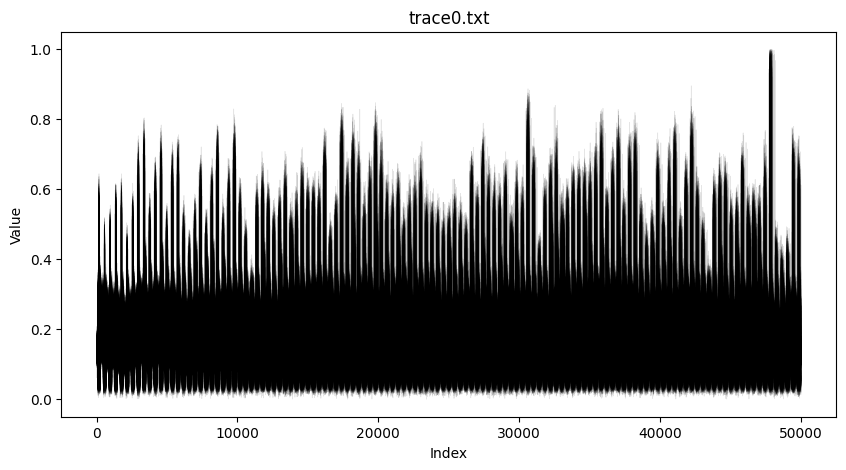

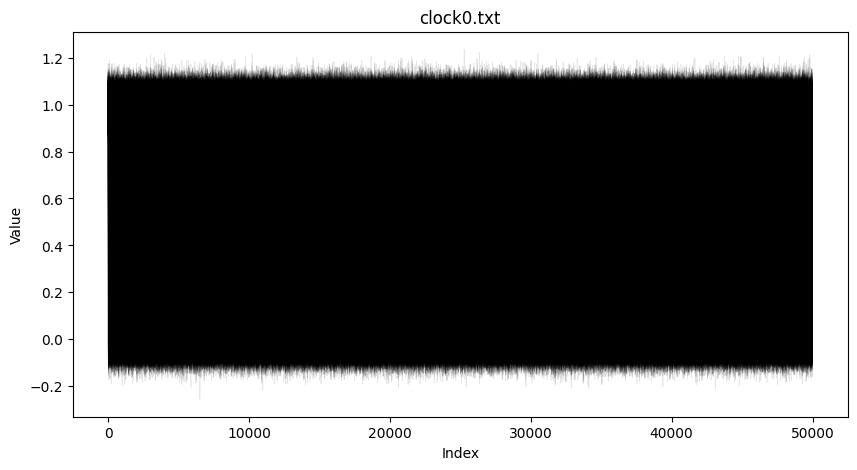

In [22]:
plt.figure(figsize=(10, 5))

for trace in all_traces[0]:
    plt.plot(trace, 'k', linewidth=0.5, alpha=0.1)

plt.title('trace0.txt')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 5))

for trace in all_clocks[0]:
    plt.plot(trace, 'k', linewidth=0.5, alpha=0.1)

plt.title('clock0.txt')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

### Showing `trace1.txt` & `clock1.txt`

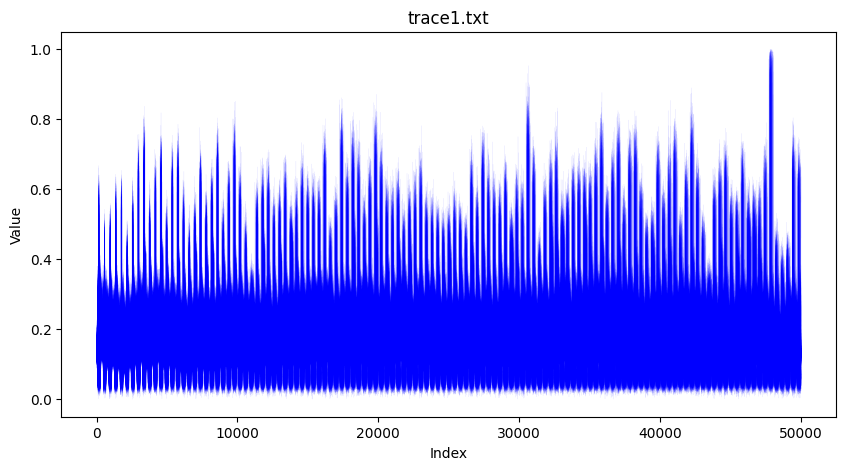

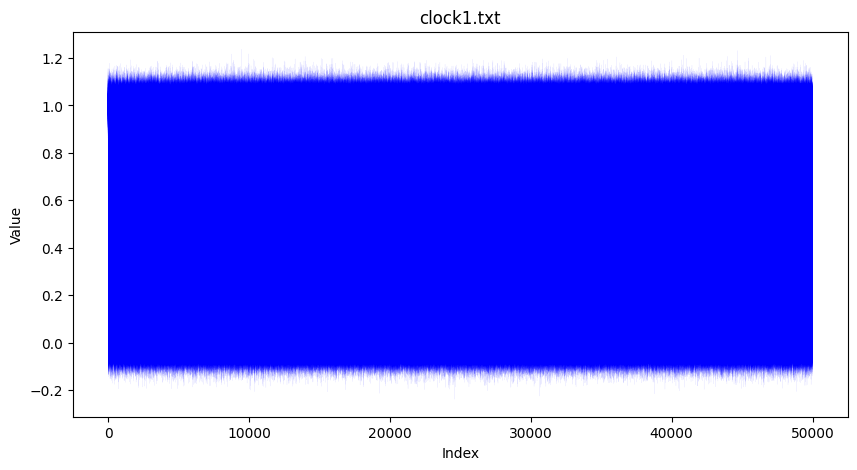

In [23]:
plt.figure(figsize=(10, 5))

for trace in all_traces[1]:
    plt.plot(trace, 'b', linewidth=0.2, alpha=0.1)

plt.title('trace1.txt')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 5))

for trace in all_clocks[1]:
    plt.plot(trace, 'b', linewidth=0.2, alpha=0.1)

plt.title('clock1.txt')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

### Showing `trace2.txt` & `clock2.txt`

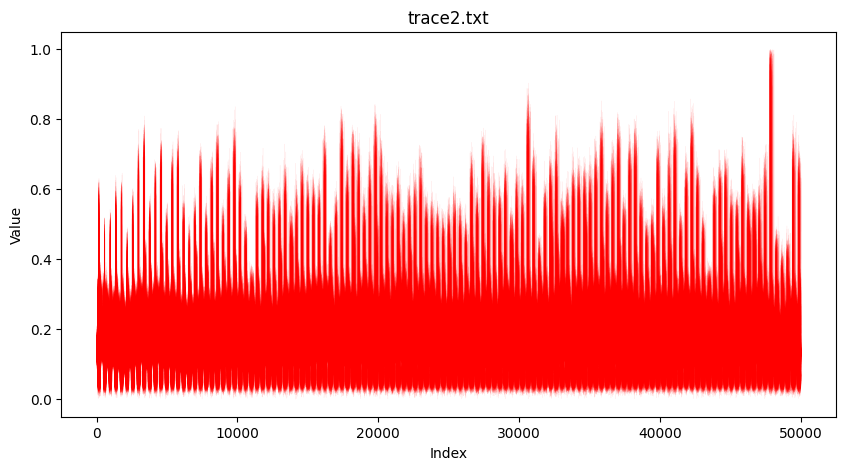

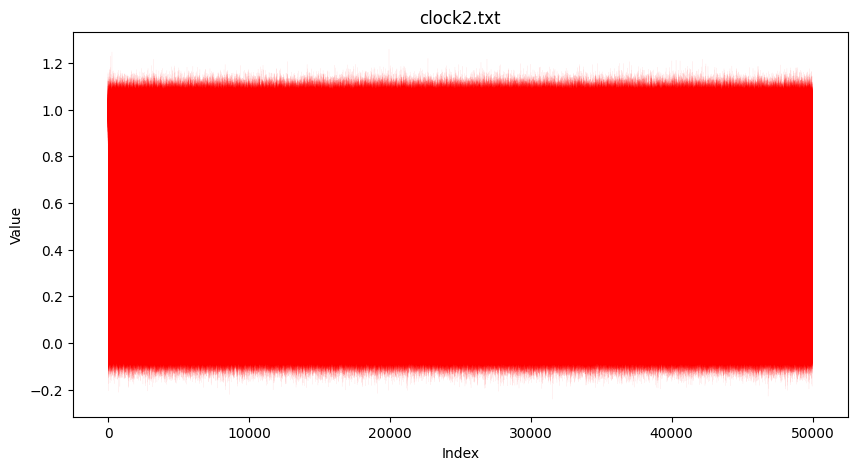

In [24]:
plt.figure(figsize=(10, 5))

for trace in all_traces[2]:
    plt.plot(trace, 'r', linewidth=0.2, alpha=0.1)

plt.title('trace2.txt')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 5))

for trace in all_clocks[2]:
    plt.plot(trace, 'r', linewidth=0.2, alpha=0.1)

plt.title('clock2.txt')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

## Compute hamming weights

In [25]:
def hamming_weight(array):
    # Convert the array to uint8 if not already
    array_uint8 = array.astype(np.uint8)
    # Unpack bits; np.unpackbits expands the innermost axis
    # We need to ensure the correct axis is expanded and summed
    unpacked_bits = np.unpackbits(array_uint8, axis=2)  # This will change the shape from (150, 16, 256) to (150, 16, 256*8)
    # Sum across the last axis which has the unpacked bits
    hamming_weights = unpacked_bits.reshape(150, 16, 256, 8).sum(axis=-1)  # Reshape and sum across the actual bit axis
    return hamming_weights

# AES S-box
sbox = np.array([
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
])

key_guesses = np.arange(256)
plaintexts_expanded = np.expand_dims(plaintexts, axis=2)
all_key_guesses = key_guesses.reshape((1, 1, 256))
sbox_input = np.bitwise_xor(plaintexts_expanded, all_key_guesses)

# Lookup in the S-box and ensure type is uint8
sbox_output = sbox[sbox_input].astype(np.uint8)

# Applying hamming_weight function
hamming_weights = hamming_weight(sbox_output)

# Checking the result
print(hamming_weights.shape)  # Expect (150, 16, 256)
print(hamming_weights[0, 0])  # Look at the first result to check range

(150, 16, 256)
[4 2 5 6 5 3 2 5 5 3 5 3 5 6 5 3 2 2 3 2 5 5 2 2 6 3 5 6 2 4 6 3 4 2 2 3 2
 4 3 3 5 4 4 3 3 4 5 3 4 4 5 4 5 5 3 6 1 5 5 4 5 5 4 4 4 4 4 3 4 3 4 5 3 4
 6 4 5 4 6 4 3 6 2 2 4 5 5 3 5 4 3 3 5 5 4 3 3 4 5 4 2 3 5 4 7 2 4 5 5 4 4
 5 3 2 5 7 3 3 3 3 3 6 3 3 4 4 4 2 4 6 5 5 6 6 5 4 5 5 6 7 4 5 1 2 4 4 4 6
 6 4 2 4 2 4 3 4 6 3 4 5 4 7 6 4 3 4 7 6 3 3 4 4 5 5 4 3 4 2 4 2 4 3 5 1 5
 4 4 6 4 1 2 3 2 4 5 4 3 3 3 2 2 5 5 3 5 5 5 3 5 4 6 1 6 0 4 4 6 3 3 3 4 6
 5 4 3 4 4 3 7 4 7 3 3 6 4 2 7 1 6 3 6 3 5 3 5 1 4 3 4 6 8 1 2 5 5 5]


## Computre correlation matrix

In [ ]:
# Correctly initialize the correlation matrix
max_correlations = np.zeros((16, 256))

# Process each key byte
for byte_index in range(16):
    print(f"{byte_index+1}/16")
    for key_guess in range(256):
        print(f"{key_guess+1}/256")

        # Extract the Hamming weight vector for the current key guess across all traces
        hamming_vector = hamming_weights[:, byte_index, key_guess]

        # Initialize a list to store correlation coefficients for current key guess across all samples
        correlation_coefficients = []

        # Compute correlation for each sample point across all traces
        for sample_index in range(50000):
            # Accessing trace sample vector correctly
            trace_sample_vector = all_traces[byte_index, :, sample_index]
            if len(hamming_vector) == len(trace_sample_vector):
                correlation, _ = pearsonr(hamming_vector, trace_sample_vector)
                correlation_coefficients.append(correlation)
            else:
                raise ValueError("The length of the hamming_vector does not match the length of the trace_sample_vector.")

        # Find the maximum correlation for this key guess
        max_correlations[byte_index, key_guess] = max(correlation_coefficients, default=0)  # Using default=0 to handle empty lists

# Identify the key guess with the highest correlation for each key byte
key = np.argmax(max_correlations, axis=1)
print("Suspected Key Bytes:", key)

In [ ]:
if np.sum(key) == 1434:
    print("Attack was successful :)")
else:
    print("Attack failed :(")
    
print(f'Key checksum: {np.sum(key)}')